In [1]:
# Libaries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Define the new working directory path
new_working_directory = r'/Users/nicol1/Documents/GitHub/sports-data'

# Change the current working directory
os.chdir(new_working_directory)

In [3]:
# Define the path 
data_folder = 'data/'

# Load the CSV files to df
cleaned_df = pd.read_csv(data_folder + 'cleaned_df.csv')
cleaned_df

,player_id,name,competition_id,country,height,foot,position,highest_market_value,number_games_played,total_minutes,...,red_cards_sum,red_cards_avg,goals,avg_goals_per_game,assists,age,year,avg_games_per_year,avg_goals_per_year,avg_assists_per_year
0,122011,Markus Henriksen,ELQ,Norway,187.0,right,Defender,5000000.0,165,12199,...,1,0.006061,33,0.200000,22,45.0,6,27.500000,5.500000,3.666667
1,14940,Razvan Rat,UKRS,Romania,179.0,left,Defender,6500000.0,97,7690,...,1,0.010309,3,0.030928,13,43.0,5,19.400000,0.600000,2.600000
2,14942,Darijo Srna,UKRS,Croatia,182.0,right,Defender,17500000.0,227,19598,...,2,0.008811,22,0.096916,68,45.0,8,28.375000,2.750000,8.500000
3,26267,Fernandinho,UKRS,Brazil,179.0,right,Midfield,32000000.0,399,30325,...,3,0.007519,29,0.072682,41,42.0,11,36.272727,2.636364,3.727273
4,55735,Henrikh Mkhitaryan,UKRS,Armenia,177.0,both,Midfield,37000000.0,485,35878,...,0,0.000000,128,0.263918,119,43.0,13,37.307692,9.846154,9.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25919,330126,Karol Świderski,IT1,Poland,184.0,left,Attack,6000000.0,89,4336,...,0,0.000000,28,0.314607,10,NaN,5,17.800000,5.600000,2.000000
25920,26485,Jérôme Boateng,IT1,Germany,192.0,right,Defender,45000000.0,351,27803,...,5,0.014245,10,0.028490,26,NaN,13,27.000000,0.769231,2.000000
25921,470422,Triantafyllos Pasalidis,IT1,Greece,185.0,right,Defender,1000000.0,142,11424,...,1,0.007042,3,0.021127,2,NaN,8,17.750000,0.375000,0.250000
25922,872184,Tadeo Allende,ES1,Argentina,183.0,right,Attack,4500000.0,1,17,...,0,0.000000,0,0.000000,0,NaN,1,1.000000,0.000000,0.000000


In [4]:
# Filter the position for goalkeeper
striker_df = cleaned_df[cleaned_df['position'] == 'Attack']
striker_df
#print(goalkeeper_df.head)

,player_id,name,competition_id,country,height,foot,position,highest_market_value,number_games_played,total_minutes,...,red_cards_sum,red_cards_avg,goals,avg_goals_per_game,assists,age,year,avg_games_per_year,avg_goals_per_year,avg_assists_per_year
5,75615,Douglas Costa,UKRS,Brazil,172.0,left,Attack,55000000.0,308,17779,...,1,0.003247,44,0.142857,74,43.0,10,30.800000,4.400000,7.400000
6,73185,Lucas Pérez,UKR1,Spain,180.0,left,Attack,17000000.0,311,21720,...,0,0.000000,87,0.279743,57,47.0,11,28.272727,7.909091,5.181818
7,119169,Aron Jóhannsson,DK1,United States,184.0,right,Attack,4000000.0,132,8280,...,1,0.007576,57,0.431818,16,42.0,8,16.500000,7.125000,2.000000
8,53477,Jonathan Cristaldo,UKR1,Argentina,174.0,right,Attack,5500000.0,70,4381,...,1,0.014286,20,0.285714,5,45.0,3,23.333333,6.666667,1.666667
11,2050,Nelson Valdez,RUSS,Paraguay,179.0,right,Attack,5000000.0,69,2881,...,0,0.000000,16,0.231884,0,43.0,4,17.250000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25911,599663,Faris Moumbagna,FR1,Cameroon,185.0,left,Attack,7000000.0,20,1069,...,0,0.000000,4,0.200000,2,NaN,4,5.000000,1.000000,0.500000
25915,726701,Rodrigo Ribeiro,GB1,Portugal,185.0,right,Attack,3000000.0,3,28,...,0,0.000000,0,0.000000,0,NaN,2,1.500000,0.000000,0.000000
25916,409517,Yorbe Vertessen,L1,Belgium,176.0,right,Attack,4500000.0,112,3611,...,0,0.000000,21,0.187500,13,NaN,5,22.400000,4.200000,2.600000
25919,330126,Karol Świderski,IT1,Poland,184.0,left,Attack,6000000.0,89,4336,...,0,0.000000,28,0.314607,10,NaN,5,17.800000,5.600000,2.000000


In [5]:
# drop NaN values
striker_df = striker_df.dropna()

# Divide data into IV (X) y DV (y)
X = striker_df[['number_games_played', 'total_minutes', 'average_minutes', 'yellow_cards_sum', 
          'yellow_cards_avg', 'red_cards_sum', 'red_cards_avg', 'goals', 'avg_goals_per_game', 
          'assists', 'age', 'year', 'avg_games_per_year', 'avg_goals_per_year', 'avg_assists_per_year']]
y = striker_df['highest_market_value']

# Divide data into trial and error 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression Model
model = LinearRegression()

# Train
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Select only numeric columns
numeric_columns = striker_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print corr matrix
print(correlation_matrix['highest_market_value'].sort_values(ascending=False))



highest_market_value    1.000000
assists                 0.803384
goals                   0.779555
avg_assists_per_year    0.771891
avg_goals_per_year      0.742470
total_minutes           0.736934
number_games_played     0.682483
avg_games_per_year      0.630132
avg_goals_per_game      0.599644
year                    0.527764
yellow_cards_sum        0.519651
average_minutes         0.428534
red_cards_sum           0.279604
yellow_cards_avg        0.027872
player_id               0.005907
age                    -0.001173
red_cards_avg          -0.006478
height                 -0.083062
Name: highest_market_value, dtype: float64


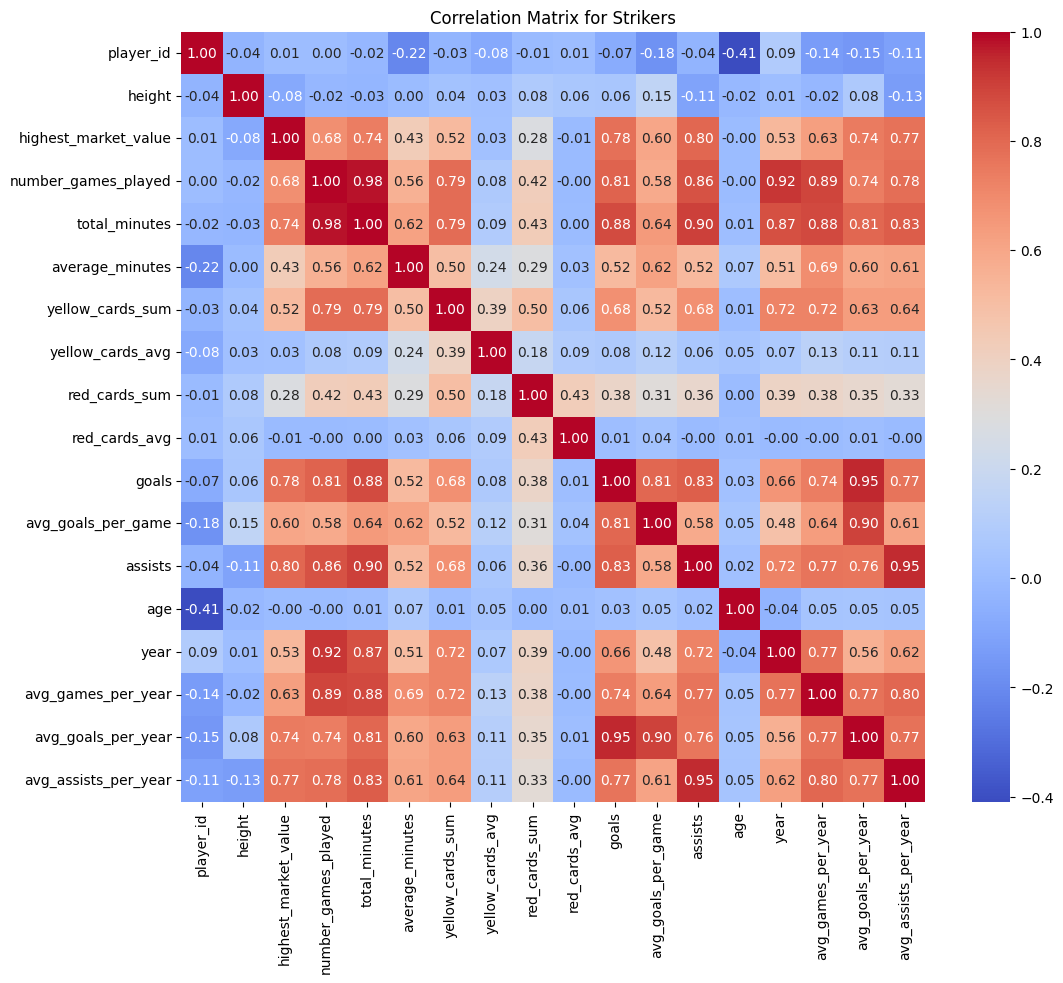

In [8]:
# Plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Strikers')
plt.show()